In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc



# data preprocessing


train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

y= train['Y']
features = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24']
Xtrain = train[features]
ID = train['Id']

Xtest = test[features]
ID_test = test['Id']

# FIRST ATTEMPT
# # # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
# # Train the model on training data
# rf.fit(Xtrain, y);
# y_pred= rf.predict(Xtest)


In [119]:
#Choose all predictors except target & IDcols

param = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]

}
xgb1 = XGBClassifier(
 learning_rate =0.2,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 objective= 'binary:logistic',
 nthread=8,
 n_estimators=1000,
 scale_pos_weight=1,
 subsample=0.9,
 colsample_bytree=0.6,
 seed=42)
model = GridSearchCV(estimator = xgb1,param_grid=param,scoring='roc_auc',n_jobs=4,iid=False, cv=3)
model.fit(Xtrain,y)
best_grid=model.best_estimator_
# y_pred = best_grid.predict_proba(Xtrain)[:,1]


In [120]:
best_grid


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.9)

In [140]:
param = {
 'reg_alpha':[1e-5, 0.1]
}
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=2000,
 subsample=0.8,
 max_depth=5,
 gamma=0.3,
 min_child_weight=1,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 eval_metric='auc',
 nthread=8,
 scale_pos_weight=1,
 seed=42)
model = GridSearchCV(estimator = xgb1,param_grid=param,scoring='roc_auc',n_jobs=-1,iid=False, cv=3)
model.fit(Xtrain,y)
best_grid=model.best_estimator_

In [136]:
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric='auc', gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=8, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.8)

In [137]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(best_grid, Xtrain, y, cv=kfold, scoring='roc_auc')
print(results)
print(results.mean)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


[0.8980393  0.86287061 0.84441856 0.89664687 0.87489951 0.90494678
 0.8723494  0.87561913 0.91230696 0.89150436]
<built-in method mean of numpy.ndarray object at 0x1a1813f670>
Accuracy: 88.34% (1.99%)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(Xtrain, y, test_size=0.20, random_state=42)
rfc=RandomForestClassifier(random_state=42)
param_grid1 = { 
    'n_estimators': [150,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

KeyboardInterrupt: 

/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/l

/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/l

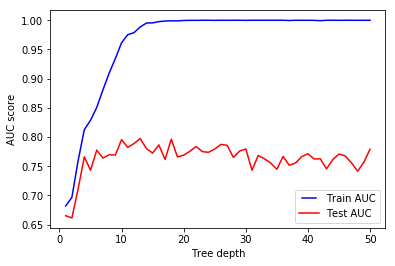

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf1 = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf1.fit(x_train, y_train)
   train_pred = rf1.predict_proba(x_train)[:,1]
#    train_pred = rf1.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf1.predict_proba(x_test)[:,1]
#    y_pred = rf1.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
 max_depths

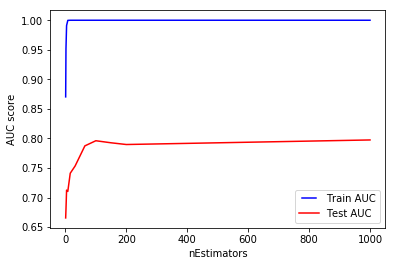

In [38]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150,200,1000]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
#    train_pred = rf.predict_proba(x_train)[:,1]
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
#    y_pred = rf.predict_proba(x_test)[:,1]
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('nEstimators')
plt.show()

/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ayushsriv/anaconda3/l

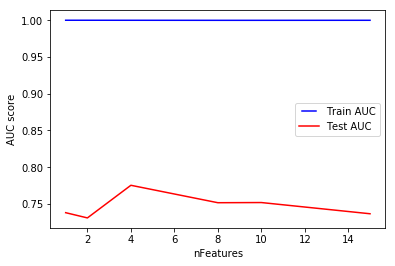

In [36]:
n_features = [1, 2, 4, 8, 10, 15]
train_results = []
test_results = []
for feature in n_features:
   rf = RandomForestClassifier(max_features=feature, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict_proba(x_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(x_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('nFeatures')
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict_proba(x_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(x_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

In [ ]:
min_samples_leaf= np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for num in min_samples_leaf:
   rf = RandomForestClassifier(min_samples_leaf=num, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict_proba(x_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict_proba(x_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_leafs')
plt.show()

In [7]:
#         RANDOMIZED SEARCH 

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 

# Number of trees in random forest
n_estimators = [200, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 4]
# Maximum number of levels in tree
max_depth = [10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain,y)
%timeit
rf_random.best_params_

{'n_estimators': [200, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 17, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 163.7min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [30],
    'max_features': ['sqrt',4],
    'n_estimators': [1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)
grid_search.fit(Xtrain,y)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 30, 'max_features': 4, 'n_estimators': 1000}

In [79]:
# rf.fit(Xtrain,y)
# grid_search.best_params_
best2_grid = grid_search.best_estimator_
best1_grid = rf_random.best_estimator_
# grid_accuracy = evaluate(best_grid, Xtest, y)
# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [71]:
best_grid= {
    'bootstrap': False,
    'max_depth': 20,
    'max_features': 'sqrt',
    'n_estimators': 1000
}

In [72]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(best_grid1, Xtrain, y, cv=kfold, scoring='roc_auc')
print(results)
print(results.mean)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NameError: name 'best_grid1' is not defined

In [81]:
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(best1_grid, Xtrain, y, cv=kfold, scoring='roc_auc')
print(results)
print(results.mean)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)) 

[0.86137122 0.87255528 0.88651193 0.85181834 0.8954025 ]
<built-in method mean of numpy.ndarray object at 0x1a35593940>
Accuracy: 87.35% (1.59%)


In [138]:
Ytest = best_grid.predict_proba(Xtest)[:,1]
solution = pd.DataFrame({"Id": ID_test, "Y": Ytest})
solution.to_csv("Forest.csv", index = False)
solution.head()

,Id,Y
0,16384,0.858931
1,16385,0.968450
2,16386,0.999981
3,16387,0.999900
4,16388,0.991742
